SETUP

In [25]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("setup complete")

setup complete


In [26]:
import numpy as np

FILEPATH

In [27]:
#path of the file to read
dataset_filepath="dataset.csv"

In [ ]:
READING THE FILE INTO A VARIABLE 

In [28]:
#Reading the file into a variable dataset_data
dataset_data = pd.read_csv('dataset.csv')

SORTING THE DATA ACCORDING TO REVIEWS IN DESCENDING ORDER

In [29]:
#Sorting the dataset according to Reviews in descending order
dataset=dataset_data.sort_values('Reviews' ,ascending=False)

PRINT THE FIVE ROWS OF THE DATA

In [30]:
#Printing the first five rows of the data
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction


In [31]:
#set the width and height of the figure 
plt.figure (figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

THE BEST SELLING BOOKS OF THE DECADE

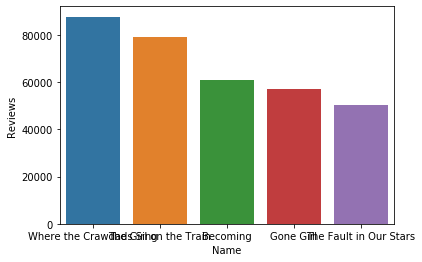

In [32]:
#barchart showing the best selling books of the decade
sns.barplot( x="Name" , y="Reviews" , data=dataset.head(10))
plt.show()

THE PERCENTAGE OF FICTION TO NONFICTION

In [ ]:
#Piechart showing the perecntage of the fiction to non-fiction
explode = (0.0 ,0.2)
colors = ("brown" ,"orange")
dataset_data.groupby('Genre').size().plot(kind='pie',explode=explode , startangle=45,colors=colors, autopct ='%1.1f%%')

plt.show()

TRENDS OVER THE YEARS

In [34]:
#sorting the dataset according to the years
datayears=dataset.sort_values('Year', ascending= True)

datayears.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
369,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2009,Non Fiction
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
498,Three Cups of Tea: One Man's Mission to Promot...,Greg Mortenson,4.3,3319,11,2009,Non Fiction


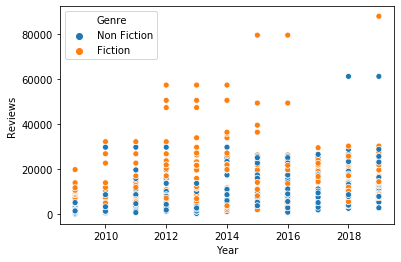

In [35]:
#scatterplot showing the trends over the years
sns.scatterplot(x='Year', y='Reviews', hue='Genre' ,data=datayears)

TOP 10 AUTHORS ACCORDING TO REVIEWS

In [44]:
#Getting rid of books that appeared more than once and also finding the mean of the reviews of the books
datarr=dataset.pivot_table(values="Reviews", index=["Name", "Author"] , aggfunc=np.mean).reset_index()
datarr

,Name,Author,Reviews
0,10-Day Green Smoothie Cleanse,JJ Smith,17350.0
1,11/22/63: A Novel,Stephen King,2052.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,18979.0
3,1984 (Signet Classics),George Orwell,21424.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,7665.0
...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,10760.0
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,1302.0
348,Wonder,R. J. Palacio,21625.0
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,9413.0


In [40]:
#summarising the reviews of books written by same authors
summary= datarr.pivot_table(values='Reviews',index ='Author',aggfunc=np.sum).sort_values('Reviews' , ascending=False)

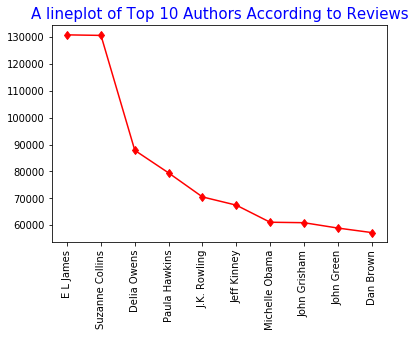

In [43]:
plt.plot(summary.index[:10], summary.Reviews.head(10), color='red' , linestyle='-' , marker='d')
plt.xticks(rotation='vertical')
plt.title('A lineplot of Top 10 Authors According to Reviews', fontsize=15 ,color='Blue') 
plt.show()